<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Datetime


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#display of warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

#for performing regression
#randomforest is a bagging forest, it reduces the variance
from sklearn.ensemble import RandomForestRegressor
#randomizedsearchcv is used to find best parameters
from sklearn.model_selection import RandomizedSearchCV
#extratreeregerros is used to find the best feature, bagging process
from sklearn.ensemble import ExtraTreesRegressor
#split into training part and testing part
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
#to perform xgboost
from xgboost import XGBRegressor
#importing metrics for tabulating the result
from sklearn.metrics import mean_squared_log_error

#all of the output will have a standard size of 15,8
plt.rcParams["figure.figsize"] = [15,8]

In [ ]:
df = pd.read_csv("car_price_train.csv")
df_test = pd.read_csv("test.csv")


In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.shape

(19237, 18)

In [ ]:
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [ ]:
#test data and normal data will always be same despite the price

In [ ]:
df.shape


(19237, 18)

In [ ]:
y = df["Price"]

In [ ]:
#merging the sets together so that both can be done together
df = df.drop(["Price"], axis = 1) #dropping col of price, axis=1 == column 
df_test = df_test.drop(["Price"], axis = 1) #drop the price col
df_merge = df.append(df_test) #appeding df with dftest
df_merge.reset_index(inplace = True)  #inplace = true means that whatever are being replaced will reflect
df_merge = df_merge.drop(["index"], axis = 1)

In [ ]:
df.shape

(19237, 17)

In [ ]:
df_merge.shape

(27482, 17)

In [ ]:
#checking the dtypes and unique values
info = pd.DataFrame()
info["DataTypes"] = df_merge.dtypes
info["Unique_values"] = df_merge.nunique()
info

,DataTypes,Unique_values
ID,int64,26886
Levy,object,635
Manufacturer,object,68
Model,object,1981
Prod. year,int64,59
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,112
Mileage,object,9977


In [ ]:
df_merge.describe(include= "object")

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482
unique,635,68,1981,11,2,7,112,9977,4,3,3,2,16
top,-,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,8273,5358,1557,12534,19926,14492,5587,1013,19296,18374,26173,25384,7196


In [ ]:
df_merge.describe(include = np.number) #numeric dtypes

,ID,Prod. year,Cylinders,Airbags
count,2.748200e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,2010.912452,4.593734,6.563569
std,9.244972e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569808e+07,2009.000000,4.000000,4.000000
50%,4.577207e+07,2012.000000,4.000000,6.000000
75%,4.580197e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,127.000000,16.000000


# Rectifying data

In [ ]:
#removing the "km" from the mileage column and coverting it to float
df_merge["Mileage"] = pd.to_numeric(df_merge.Mileage.str.split(" ").str[0], downcast = "float")  

In [ ]:
#np.where is used to replace with a particular value
k = df_merge[df_merge["Mileage"] == 0]

In [ ]:
k.shape #df_merge has got both test and train values

(1013, 17)

In [ ]:
df_merge["Mileage"] = np.where(df_merge["Mileage"] == 0.0, df_merge["Mileage"].mean(), df_merge["Mileage"])
#whenever df_merge ["mileage "] == 0 we replace it with the mean and the rest without 0 we keep the mileage

In [ ]:
df_merge["Levy"].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [ ]:
#converting the levy col to float as it is the tax
df_merge["Levy"] = pd.to_numeric(df_merge["Levy"].replace("-", 0), downcast = "float")

In [ ]:
#replacing the 0 in the "Levy" column with mean of that coumn
df_merge["Levy"] = np.where(df_merge["Levy"] == 0.0, df_merge["Levy"].mean(), df_merge["Levy"])

In [ ]:
df_merge["Levy"].unique()

array([ 1399.   ,  1018.   ,   636.173,   862.   ,   446.   ,   891.   ,
         761.   ,   751.   ,   394.   ,  1053.   ,  1055.   ,  1079.   ,
         810.   ,  2386.   ,  1850.   ,   531.   ,   586.   ,  1249.   ,
        2455.   ,   583.   ,  1537.   ,  1288.   ,   915.   ,  1750.   ,
         707.   ,  1077.   ,  1486.   ,  1091.   ,   650.   ,   382.   ,
        1436.   ,  1194.   ,   503.   ,  1017.   ,  1104.   ,   639.   ,
         629.   ,   919.   ,   781.   ,   530.   ,   640.   ,   765.   ,
         777.   ,   779.   ,   934.   ,   769.   ,   645.   ,  1185.   ,
        1324.   ,   830.   ,  1187.   ,  1111.   ,   760.   ,   642.   ,
        1604.   ,  1095.   ,   966.   ,   473.   ,  1138.   ,  1811.   ,
         988.   ,   917.   ,  1156.   ,   687.   , 11714.   ,   836.   ,
        1347.   ,  2866.   ,  1646.   ,   259.   ,   609.   ,   697.   ,
         585.   ,   475.   ,   690.   ,   308.   ,  1823.   ,  1361.   ,
        1273.   ,   924.   ,   584.   ,  2078.   , 

In [ ]:
#working with Engine volume
df_merge["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
df_merge["Engine volume"] = pd.to_numeric(df_merge["Engine volume"]. str.split(" ").str[0], downcast = "float")

In [ ]:
#replace 0 with mean
df_merge["Engine volume"] = np.where(df_merge["Engine volume"] == 0.0, df_merge["Engine volume"].mean(), df_merge["Engine volume"])

In [ ]:
df_merge["Engine volume"].unique()

array([ 3.5    ,  3.     ,  1.3    ,  2.5    ,  2.     ,  1.8    ,
        2.4    ,  4.     ,  1.6    ,  3.3    ,  2.2    ,  4.7    ,
        1.5    ,  4.4    ,  1.4    ,  3.6    ,  2.3    ,  5.5    ,
        2.8    ,  3.2    ,  3.8    ,  4.6    ,  1.2    ,  5.     ,
        1.7    ,  2.9    ,  0.5    ,  1.9    ,  2.7    ,  4.8    ,
        5.3    ,  0.4    ,  1.1    ,  2.1    ,  0.7    ,  5.4    ,
        3.7    ,  1.     ,  2.6    ,  0.8    ,  0.2    ,  5.7    ,
        6.7    ,  6.2    ,  3.4    ,  6.3    ,  4.3    ,  4.2    ,
        2.31316, 20.     ,  0.3    ,  5.9    ,  5.6    ,  6.     ,
        0.6    ,  6.8    ,  4.5    ,  7.3    ,  0.1    ,  3.1    ,
        6.4    ,  3.9    ,  0.9    ,  5.2    ,  5.8    ,  6.6    ,
        6.1    , 10.8    ], dtype=float32)

In [ ]:
#feature enginnering the prodcution year column
import datetime as dt
curr_time = dt.datetime.now()
df_merge["Prod. year"] = curr_time.year - df_merge["Prod. year"]

In [ ]:
dt.datetime.now()

datetime.datetime(2022, 7, 11, 22, 31, 33, 381854)

In [ ]:
curr_time.year

2022

In [ ]:
df_merge.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,12,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,11,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,636.172974,HONDA,FIT,16,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,11,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,8,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Extrapolatory Data Analysis

In [ ]:
df_merge.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

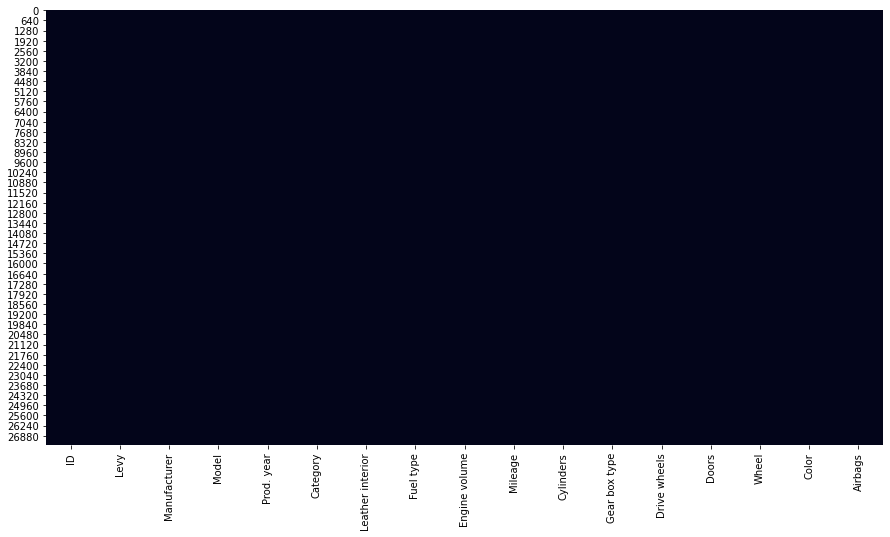

In [ ]:
sns.heatmap(df_merge.isnull(), cbar = False)
plt.show

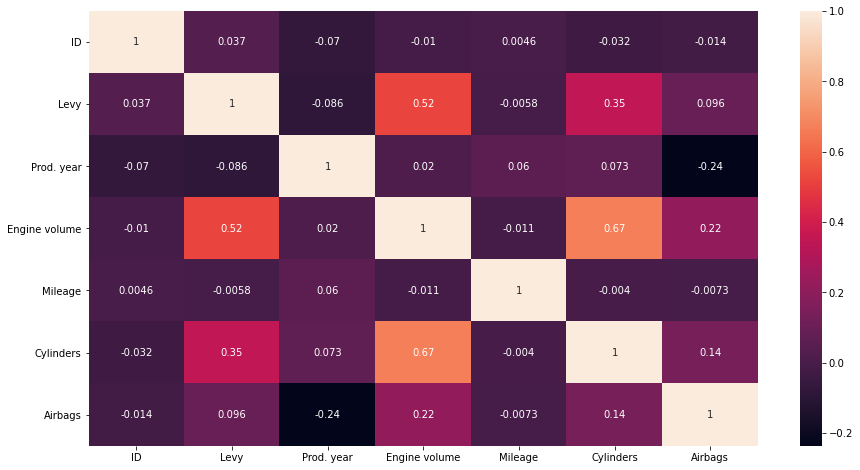

In [ ]:
#correlation, annot=True gives the numbers inside the box
sns.heatmap(df_merge.corr(), cbar = True, annot = True)

In [ ]:
df_merge.corr()

,ID,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
ID,1.000000,0.036516,-0.070181,-0.010288,0.004644,-0.032212,-0.014193
Levy,0.036516,1.000000,-0.086094,0.520686,-0.005820,0.351834,0.096323
Prod. year,-0.070181,-0.086094,1.000000,0.019688,0.059972,0.072717,-0.236227
Engine volume,-0.010288,0.520686,0.019688,1.000000,-0.011128,0.668270,0.216082
Mileage,0.004644,-0.005820,0.059972,-0.011128,1.000000,-0.004017,-0.007301
Cylinders,-0.032212,0.351834,0.072717,0.668270,-0.004017,1.000000,0.140130
Airbags,-0.014193,0.096323,-0.236227,0.216082,-0.007301,0.140130,1.000000


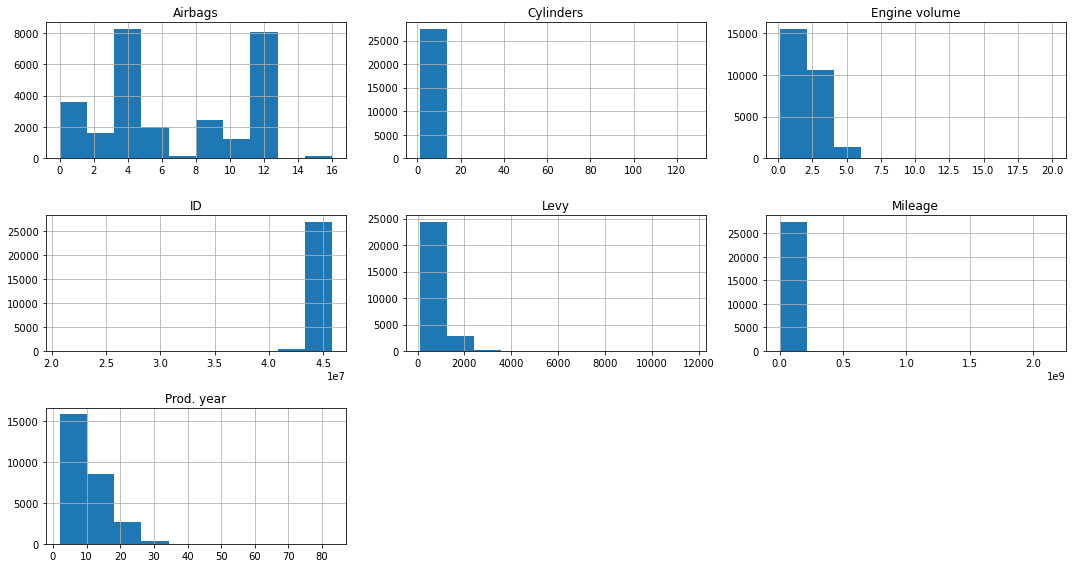

In [ ]:
#distribution of numeric variables
df_merge.hist()
plt.tight_layout()
plt.show()

In [ ]:
# "prod.year", "levy" and "engine volume" columsn are right skewed

In [ ]:
#shapiro test to check the skewness of the target variables
from scipy.stats import shapiro
x = shapiro(y)
if x[1] <= 0.05:
    print("Negatively skewed")
else:
    print("Positively skewed")

Negatively skewed


In [ ]:
y.skew()

136.47042654268714

In [ ]:
# as from the shapiro test we can see that "Price" column is neg skewed so we need to normalize it
y = np.log(y)

# Building the model

In [ ]:
categ = df_merge.select_dtypes(include = "object")
num = df_merge.select_dtypes(include = np.number)

In [ ]:
#getting dummies for the categorical var
cat_dummies = pd.get_dummies(categ, drop_first = True)
#drop_first = True means that to dec the compilation time

In [ ]:
#crete the final dataset
df_final = pd.concat([num, cat_dummies], axis = 1)

In [ ]:
df_final.shape

(27482, 2094)

In [ ]:
df_final.head()

,ID,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,1399.000000,12,3.5,186005.0,6.0,12,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,1018.000000,11,3.0,192000.0,6.0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45774419,636.172974,16,1.3,200000.0,4.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,862.000000,11,2.5,168966.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,446.000000,8,1.3,91901.0,4.0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# segregate the training and test data before model building
train_data = df_final.iloc[:19237] #[start:stop:step]
train_data.shape

(19237, 2094)

In [ ]:
# split the data into test and train
X = train_data
Y = y

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 10)
#test size = 70% and 30% to train and test, random_state = randomliy assign

In [ ]:
rf_model = RandomForestRegressor()

# Feature selection using extra tree regressor

In [ ]:
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)

ExtraTreesRegressor()

In [ ]:
#finding imp features
feat_importances = pd.Series(reg.feature_importances_, index = X_train.columns)

In [ ]:
pd.DataFrame(feat_importances.nlargest(30)).index

Index(['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Levy', 'Leather interior_Yes', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Engine volume', 'Fuel type_Diesel', 'Color_White',
       'Drive wheels_Front', 'Color_Black', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive',
       'Manufacturer_SSANGYONG', 'Category_Sedan', 'Gear box type_Variator',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Fuel type_Petrol',
       'Drive wheels_Rear', 'Color_Blue', 'Model_Prius', 'Category_Hatchback',
       'Manufacturer_LEXUS'],
      dtype='object')

In [ ]:
#instantiating the randomforest regressor using the best parameter
mod4 = RandomForestRegressor(n_estimators = 1000, max_depth = 25,
    max_features = "sqrt",
    min_samples_leaf = 1, 
    min_samples_split = 2)

In [ ]:
X1 = train_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Fuel type_Diesel', 'Engine volume', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive',
       'Manufacturer_SSANGYONG', 'Category_Sedan', 'Gear box type_Variator',
       'Category_Jeep', 'Manufacturer_TOYOTA', 'Drive wheels_Rear',
       'Fuel type_Petrol', 'Color_Blue', 'Model_Prius']]
y1 = y

X1_train, X1_test, y1_train, y1_test =train_test_split(X1,y1, test_size = 0.3, random_state = 10)

In [ ]:
#fit the model
model5 = mod4.fit(X1_train, y1_train)

In [ ]:
#predicting the data
y_predict = model5.predict(X1_test)

In [ ]:
#cal the RMLSE score
RMLSE = np.sqrt(mean_squared_log_error(np.exp(y1_test), np.exp(y_predict)))

In [ ]:
RMLSE

0.8435238220985561

In [ ]:
xgb = XGBRegressor(random_state = 123, max_depth = 7, learning_rate = 0.2, n_estimators = 1500)
xgb.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
#predicting data
y_predict = xgb.predict(X1_test)

In [ ]:
import statsmodels.api as sm
#build a full model using OLS()
linreg_full_model = sm.OLS(y1_train, X1_train).fit()

In [ ]:
linreg_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.943e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        22:33:10   Log-Likelihood:                         -23857.
No. Observations:               13465   AIC:                                  4.777e+04
Df Residuals:                   13437   BIC:                                  4.798e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Airbags                    -0.0495      0.003    -14.861      0.000      -0.056      -0.043
Mileage                 -4.469e-10    2.4e-10     -1.865      0.062   -9.17e-10    2.27e-11
Prod. year                 -0.0551      0.003    -20.378      0.000      -0.060      -0.050
ID                       2.175e-07   2.39e-09     90.948      0.000    2.13e-07    2.22e-07
Gear box type_Tiptronic     1.1974      0.037     32.761      0.000       1.126       1.269
Leather interior_Yes       -0.4452      0.034    -12.951      0.000      -0.513      -0.378
Levy                       -0.0002   3.67e-05     -6.286      0.000      -0.000      -0.000
Manufacturer_HYUNDAI        0.4906      0.039     12.498      0.000       0.414       0.568
Fuel type_Hybrid           -0.7567      0.060    -12.626      0.000      -0.874      -0.639
Fuel type_Diesel            0.3163      0.055      5.716      0.000       0.208       0.425
Engine volume               0.0767      0.028      2.733      0.006       0.022       0.132
Color_White                -0.1055      0.046     -2.305      0.021      -0.195      -0.016
Color_Black                -0.0709      0.046     -1.557      0.120      -0.160       0.018
Drive wheels_Front          0.2701      0.044      6.203      0.000       0.185       0.355
Model_FIT                  -0.5381      0.089     -6.062      0.000      -0.712      -0.364
Color_Grey                 -0.0843      0.052     -1.629      0.103      -0.186       0.017
Color_Silver               -0.0527      0.047     -1.130      0.258      -0.144       0.039
Cylinders                   0.0324      0.018      1.786      0.074      -0.003       0.068
Wheel_Right-hand drive     -0.4161      0.056     -7.482      0.000      -0.525      -0.307
Manufacturer_SSANGYONG      0.8453      0.090      9.402      0.000       0.669       1.022
Category_Sedan             -0.2556      0.034     -7.515      0.000      -0.322      -0.189
Gear box type_Variator      0.9088      0.068     13.333      0.000       0.775       1.042
Category_Jeep               0.0470      0.042      1.122      0.262      -0.035       0.129
Manufacturer_TOYOTA         0.3222      0.042      7.709      0.000       0.240       0.404
Drive wheels_Rear           0.4001      0.051      7.789      0.000       0.299       0.501
Fuel type_Petrol           -0.1701      0.050     -3.406      0.001      -0.268      -0.072
Color_Blue                 -0.0808      0.058     -1.382      0.167      -0.195       0.034
Model_Prius                -0.2269      0.066     -3.419      0.001      -0.357      -0.097
==============================================================================
Omnibus:                     3106.893   Durbin-Watson